# Exploratory Data Analysis
#### Pre_normalized dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

In [2]:
# Read the preprocessed data
import os

file_path = os.path.join('..', 'data', 'csvs', 'pre_normalized.csv')
df = pd.read_csv(file_path)
df.head()

,text,label
0,autor bestseller cita 5 expressoes indicam int...,fake
1,juiz df confirma indicios expresidente petista...,fake
2,senhora 60 anos corre atras eduardo cunha aero...,fake
3,russia ameaca derrubar avioes americanos siria...,fake
4,governo podera demitir 18 mil servidores banco...,fake


In [3]:
# Split into fake and true news
fake_df = df[df["label"] == 'fake']
true_df = df[df["label"] == 'true']

In [4]:
# Create bag of words for each df
from sklearn.feature_extraction.text import CountVectorizer

fake_bag = CountVectorizer().fit(fake_df["text"])
true_bag = CountVectorizer().fit(true_df["text"])


In [5]:
fake_cv = CountVectorizer()
fake_matrix = fake_cv.fit_transform(fake_df["text"])
fake_bag = {}
for word in fake_cv.get_feature_names_out(): 
    fake_bag[word] = fake_matrix[:, fake_cv.vocabulary_[word]].sum()


In [6]:
true_cv = CountVectorizer()
true_matrix = true_cv.fit_transform(true_df["text"])
true_bag = {}
for word in true_cv.get_feature_names_out(): 
    true_bag[word] = true_matrix[:, true_cv.vocabulary_[word]].sum()

In [7]:
# Create a bag of words with the difference between the two

# Get all words from both bags
all_words = set(list(fake_bag.keys()) + list(true_bag.keys()))

bag = {}
for word in all_words:
    if word in fake_bag and word in true_bag:
        bag[word] = true_bag[word] - fake_bag[word]
    elif word in fake_bag:
        bag[word] = -fake_bag[word]
    else:
        bag[word] = true_bag[word]

In [8]:
# Create a bag of words with the difference between the two

# Get all words from both bags
all_words = set(list(fake_bag.keys()) + list(true_bag.keys()))

bag = {}
for word in all_words:
    if word in fake_bag and word in true_bag:
        bag[word] = true_bag[word] - fake_bag[word]
    elif word in fake_bag:
        bag[word] = -fake_bag[word]
    else:
        bag[word] = true_bag[word]


In [9]:
worst_to_best = sorted(bag.items(), key= lambda x: x[1])

print(f"worst word: {worst_to_best[:5]}")
print(f"best word: {worst_to_best[-5:]}")

worst word: [('dilma', -1291), ('lula', -1081), ('disse', -1053), ('video', -502), ('brasil', -418)]
best word: [('lava', 648), ('segundo', 657), ('tribunal', 758), ('federal', 973), ('nesta', 1421)]


Text(0.5, 0.98, 'Depois da normalização')

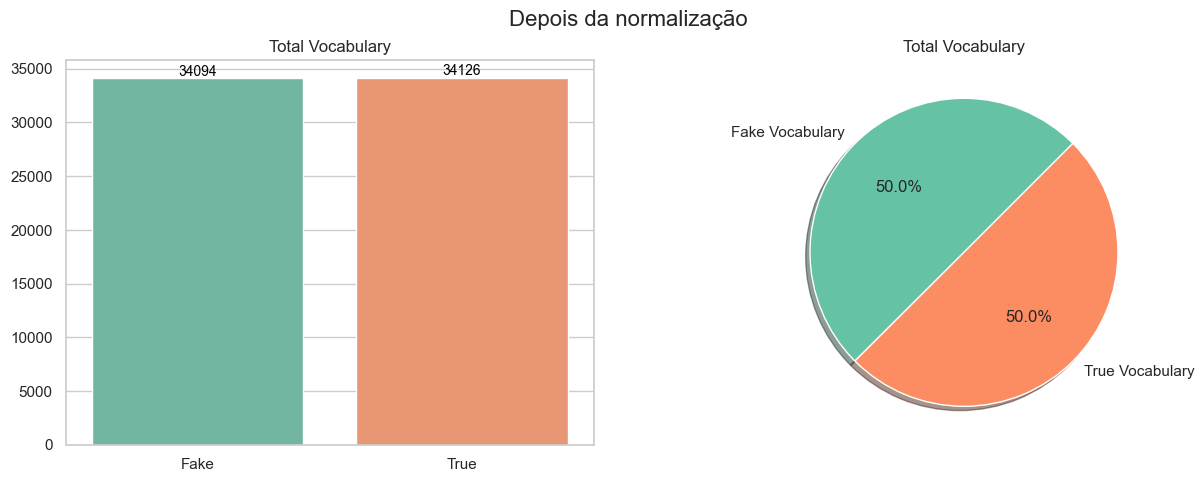

In [10]:
# Total vacubulary for each bag
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
sns.barplot(x=["Fake", "True"], y=[len(fake_bag), len(true_bag)], ax = axes[0])
axes[0].bar_label(axes[0].containers[0], label_type='edge', fmt='%d', color='black', size=10)
axes[0].title.set_text("Total Vocabulary")


axes[1].pie([len(fake_bag), len(true_bag)], labels=["Fake Vocabulary", "True Vocabulary"], autopct='%1.1f%%', shadow=True, startangle= 45)
axes[1].title.set_text("Total Vocabulary")

fig.suptitle('Depois da normalização', fontsize=16)

Text(0.5, 0.98, 'Depois da normalização')

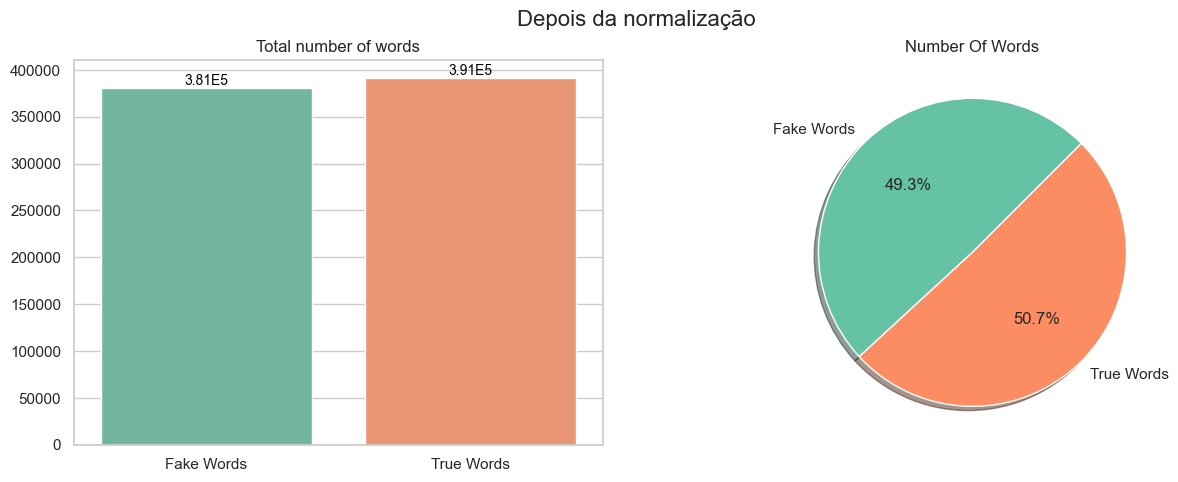

In [18]:
numberOfFakeWords = 0
for fake in fake_df['text']:
    fake = fake.split()
    numberOfFakeWords += len(fake)

numberOfTrueWords = 0
for true in true_df['text']:
    true = true.split()
    numberOfTrueWords += len(true)

# numberOfFakeWords = sum(fake_bag.values())
# numberOfTrueWords = sum(true_bag.values())
numberOfWords = numberOfFakeWords + numberOfTrueWords

def my_fmt(x):
    return f"{x/10**5:.2f}E5"

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
sns.barplot(x=["Fake Words", "True Words"], y=[numberOfFakeWords, numberOfTrueWords], ax = axes[0])
axes[0].bar_label(axes[0].containers[0], label_type='edge', fmt= my_fmt, color='black', size=10)
axes[0].title.set_text("Total number of words")


axes[1].pie([numberOfFakeWords, numberOfTrueWords], labels=["Fake Words", "True Words"], autopct='%1.1f%%', shadow=True, startangle= 45)
axes[1].title.set_text("Number Of Words")

fig.suptitle('Depois da normalização', fontsize=16)

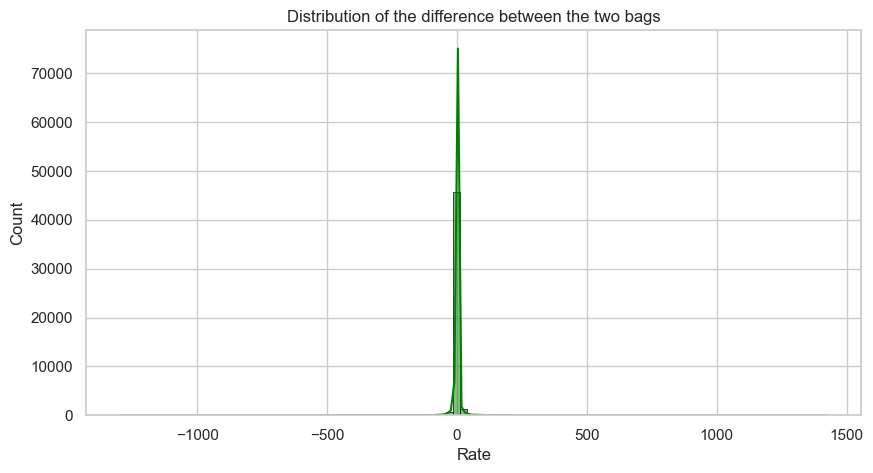

In [12]:
distribution_df = pd.DataFrame(bag.values(), columns=["Rate"])
distribution_df

# Create a histogram of the distribution

plt.figure(figsize=(10,5))
sns.histplot(distribution_df["Rate"], bins=100, kde=True, alpha=0.5, linewidth=0.5, edgecolor="black", color="green")
plt.title("Distribution of the difference between the two bags")
plt.show()

Most of words have 0 near rate (present in fake and true)

In [13]:
normalized_fake_bag = {}

for word in fake_bag:
    normalized_fake_bag[word] = fake_bag[word] / numberOfFakeWords

normalized_true_bag = {}
for word in true_bag:
    normalized_true_bag[word] = true_bag[word] / numberOfTrueWords

normalized_bag = {}
for word in all_words:
    if word in normalized_fake_bag and word in normalized_true_bag:
        normalized_bag[word] = normalized_true_bag[word] - normalized_fake_bag[word]
    elif word in fake_bag:
        normalized_bag[word] = -normalized_fake_bag[word]
    else:
        normalized_bag[word] = normalized_true_bag[word]

normalized_distribution_df = pd.DataFrame(normalized_bag.items(), columns=["Word", "Rate"])

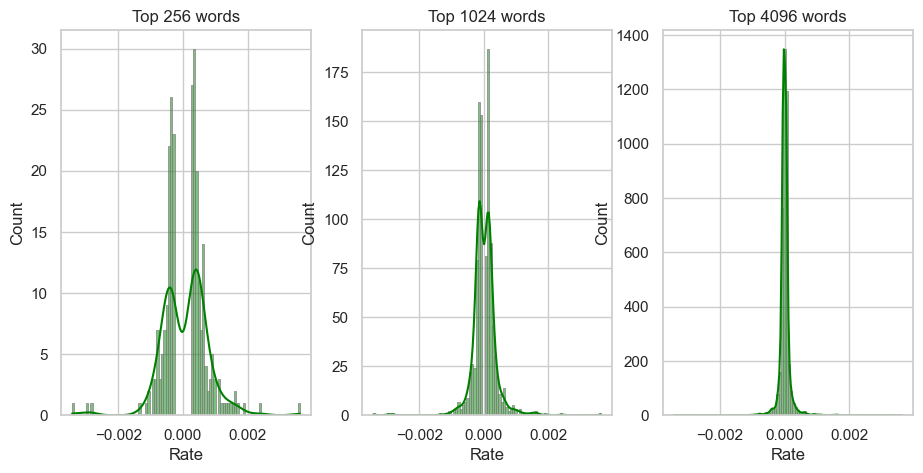

In [14]:
def select_df(df, top_values):
    return df.sort_values(by="Rate", key=abs, ascending=False).head(top_values)

top_values = 1024
# only keep top_values words with greatest rate in absolute value
selected_distribution_df = select_df(normalized_distribution_df, top_values)

values_plot = [256, 1024, 4096]
# Create a histogram of the distribution
fig, axes = plt.subplots(1, len(values_plot), figsize=(11,5))
axes = axes.ravel()

for i, value in enumerate(values_plot):
    df_plot = select_df(normalized_distribution_df, value)
    sns.histplot(df_plot["Rate"], bins=100, kde=True, ax=axes[i], linewidth=0.5, edgecolor="gray", color="green")	
    axes[i].title.set_text(f"Top {value} words")
plt.show()

In [15]:
i = 0
filtered_vocab = {}
for word in selected_distribution_df["Word"]:
    # if word.isnumeric():
    #     continue
    filtered_vocab[word] = i
    i += 1

In [16]:
# # save filtered vocabulary to csv
# with open('../data/vocabularies/filtered_vocab_'+str(top_values)+'.csv', 'w') as f:
#     f.write("word,index\n")
#     for key in filtered_vocab.keys():
#         f.write("%s,%d\n" % (key, filtered_vocab[key]))

In [17]:
numberOfNegativeWords = len(selected_distribution_df[selected_distribution_df["Rate"] < 0])
numberOfPositiveWords = len(selected_distribution_df[selected_distribution_df["Rate"] > 0])

print(f"Number of negative words: {numberOfNegativeWords}")
print(f"Number of positive words: {numberOfPositiveWords}")

bag_filtered = CountVectorizer(vocabulary=filtered_vocab)
print(f"Total number of words in the vocabulary: {len(filtered_vocab)}")
print(filtered_vocab.keys())


Number of negative words: 508
Number of positive words: 516
Total number of words in the vocabulary: 1024
dict_keys(['nesta', 'dilma', 'lula', 'disse', 'federal', 'tribunal', 'segundo', 'lava', 'jato', 'ano', '2017', 'anos', 'video', 'diz', 'quartafeira', 'sobre', 'brasil', 'rio', 'tercafeira', 'desta', 'hoje', 'lavajato', 'decisao', 'quintafeira', 'g1', 'globo', 'pt', 'luiz', 'eldorado', 'supremo', 'segundafeira', 'jornalista', 'acordo', 'tudo', 'apos', 'sextafeira', 'regiao', 'pra', 'temer', 'petista', 'moro', 'atraves', 'povo', 'pais', 'impeachment', 'dia', 'durante', 'operacao', 'informou', 'podera', 'primeira', 'julgamento', 'tres', 'silva', 'sergio', 'cunha', 'redes', 'justica', 'ouvir', 'janeiro', 'noite', 'principais', 'vai', 'presidente', 'afirmou', 'eua', 'sociais', 'inacio', 'denuncia', 'desde', 'expresidente', 'estados', 'ministerio', 'camara', 'pedido', 'deputado', 'defesa', 'sendo', 'informacoes', 'porque', 'bolsonaro', 'materia', 'clique', '2018', 'reforma', 'site', 'nad